# Assignment- Employee Attrition

## Use the Employee attrition dataset and perform the following:

### 1. Data exploration and data cleaning:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import the csv file

df = pd.read_csv("employees_attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### a. understand the data and get some interesting visuals

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
# lets check the no. of unique elements in each columns
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [5]:
# colums having non numeric elements(datatype = object)

df.select_dtypes(include=['object'])

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [6]:
# Let's check the columns having only numerical data

df.select_dtypes(include=['int','float']).dtypes

Age                         int64
Attrition                   int64
DailyRate                   int64
DistanceFromHome            int64
Education                   int64
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

In [7]:
# lets check each unique elements in every columns having object datatype

df.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [8]:
df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [9]:
df.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [10]:
df.JobRole.value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

# d. check the correlation of the numerical columns through heatmap

In [11]:
numerical_columns = df.select_dtypes(exclude=['object'])
numerical_columns.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,1,1,2,94,3,...,1,80,0,8,0,1,6,4,0,5
1,49,0,279,8,1,1,2,3,61,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,1,4,4,92,2,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,1,5,4,56,3,...,3,80,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,7,1,40,3,...,4,80,1,6,3,3,2,2,2,2


<AxesSubplot:>

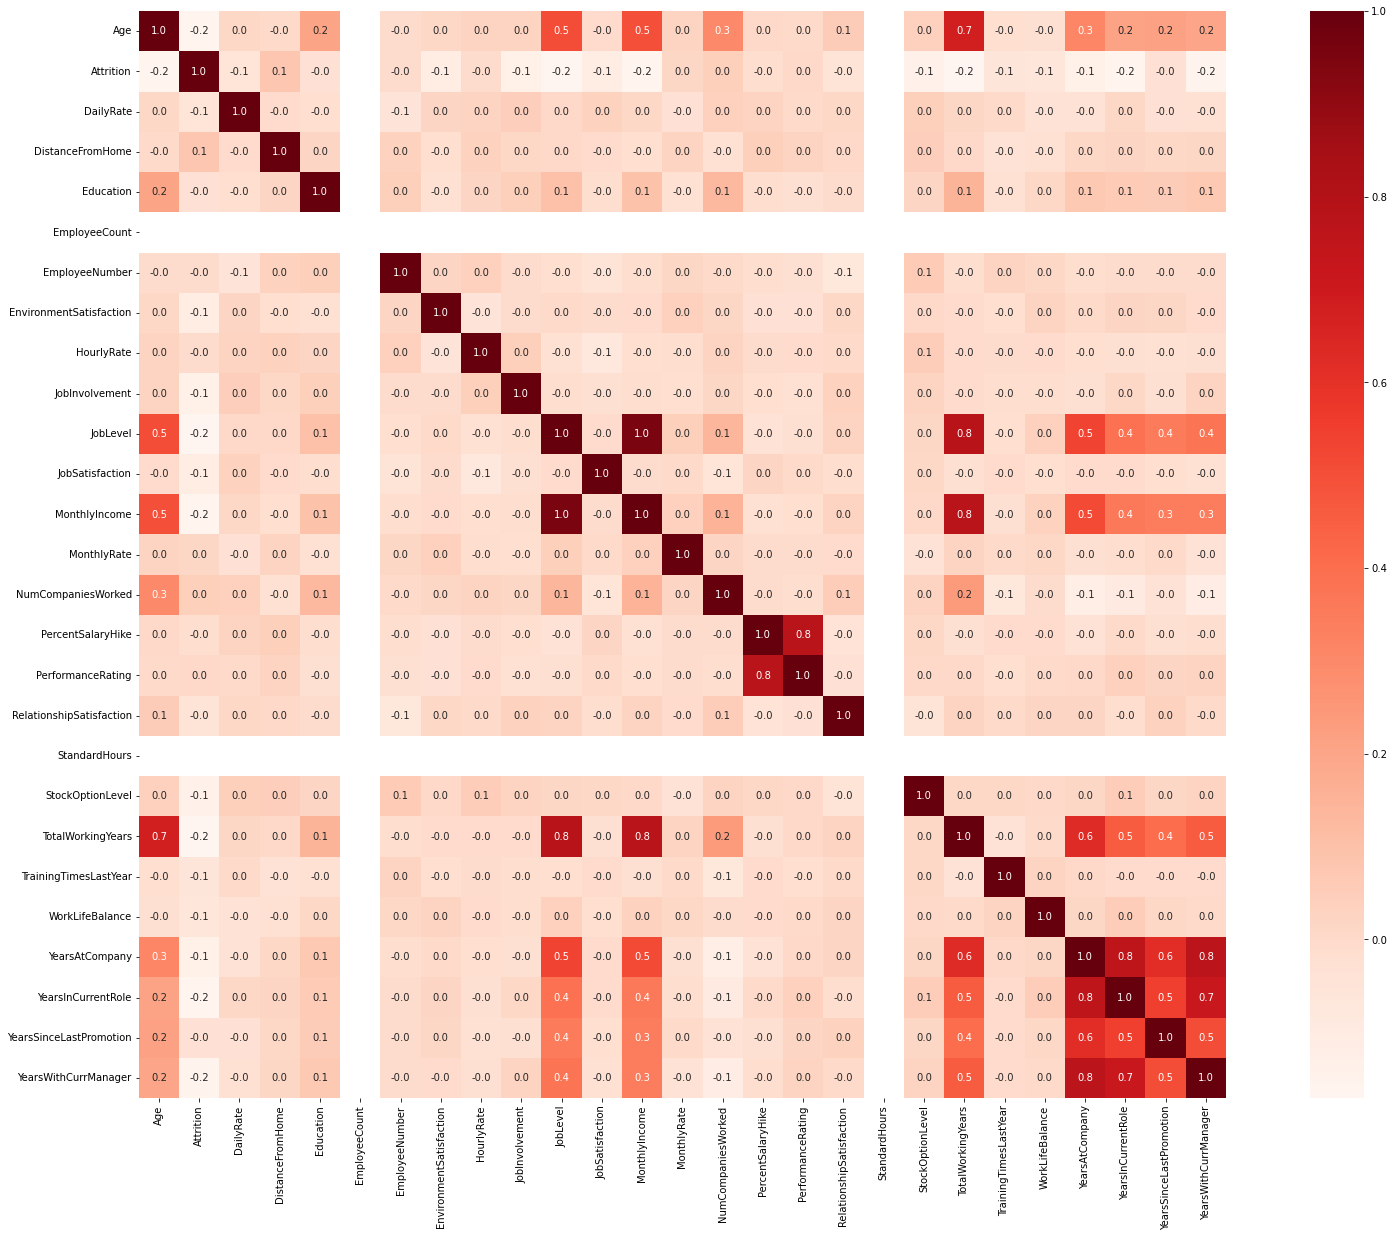

In [12]:
numerical_columns = df.select_dtypes(exclude=['object'])
corr = numerical_columns.corr()
plt.figure(figsize=(30,20))
sns.heatmap(corr,annot=True, fmt='.1f',cmap = 'Reds',square = 'True')


In [13]:
attirition = df['Attrition'].value_counts()

In [14]:
attirition

0    1233
1     237
Name: Attrition, dtype: int64

([<matplotlib.patches.Wedge at 0x2645e51fa60>,
 [Text(-1.0056140220003909, 0.5578892710531345, 'No'),
  Text(1.0056140220003906, -0.5578892710531345, 'Yes')],
 [Text(-0.5683905341741339, 0.3153287184213368, '83.9%'),
  Text(0.5683905341741339, -0.31532871842133686, '16.1%')])

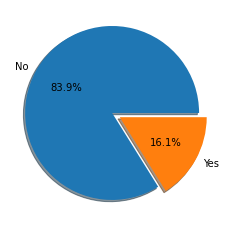

In [15]:
plt.pie(attirition, shadow ='bool',explode=[0.05, 0.05],labels=['No', 'Yes'],autopct='%1.1f%%')

### b. check null values

In [16]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### c. Encode string categorical columns

In [17]:
# encoding using pd.get_dummies

df_encoded = pd.get_dummies(df)

In [18]:
df_encoded.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,1,1,2,94,3,...,0,0,1,0,0,0,1,1,0,1
1,49,0,279,8,1,1,2,3,61,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1,1373,2,2,1,4,4,92,2,...,0,0,0,0,0,0,1,1,0,1
3,33,0,1392,3,4,1,5,4,56,3,...,0,1,0,0,0,1,0,1,0,1
4,27,0,591,2,1,1,7,1,40,3,...,0,0,0,0,0,1,0,1,1,0


In [19]:
df_encoded.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender

## 2. Model building:

### a. Split the data into test and train with 80% train size and random state 0

In [20]:
# split the data into two parts, X(features) and y(target)

X = df_encoded.drop(columns='Attrition')
X.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,1,2,3,61,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,0,0,0,0,0,1,0,1,1,0


In [21]:
y= df['Attrition']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
X_test,X_train,y_test,y_train = train_test_split(X,y,test_size=0.2,random_state =0,stratify = y  )

### b. Apply decision tree

In [29]:
# import the model
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini')

In [30]:
# train the model

dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [31]:
# predict the output using test data

y_pred = dtc.predict(X_test)
y_pred



array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
# lets see the actual attrition value and predicted attrition value side by side

compare_test_pred = pd.DataFrame(data = {'acctual':y_test,'predicted':y_pred})
compare_test_pred

,acctual,predicted
237,0,0
549,0,0
947,1,0
1340,0,0
1273,1,1
...,...,...
443,1,1
449,0,1
582,0,0
506,0,0


In [33]:
# lets check the performance of the model using accuracy, f1_score, etc.

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
accuracy_score(y_test,y_pred)

0.7525510204081632

In [34]:
f1_score(y_test,y_pred)

0.2885085574572127

In [35]:
confusion_matrix(y_test,y_pred)

array([[826, 160],
       [131,  59]], dtype=int64)

### c. prune the tree and get the best hyper parameters

In [36]:
# import GridSearchCV for hyper parameter tuning
from sklearn.model_selection import GridSearchCV

In [37]:
dtc_cv = DecisionTreeClassifier(random_state = 0)

In [38]:
# select parameters and initiate GridSearchCV
params = {'max_depth':list(range(2,50)),'criterion':['gini','entropy']}

cv_gs = GridSearchCV(dtc_cv, param_grid=params)
cv_gs

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                       24, 25, 26, 27, 28, 29, 30, 31, ...]})

In [39]:
cv_gs.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                       24, 25, 26, 27, 28, 29, 30, 31, ...]})

In [40]:
cv_gs.best_params_

{'criterion': 'entropy', 'max_depth': 3}

### d. Obtain the Confusion matrix, Accuracy, F1 score and ROC-AUC and plot the ROC curve

In [41]:
dtc_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=3,random_state =0)
dtc_tuned

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [42]:
dtc_tuned.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [43]:
y_tuned = dtc_tuned.predict(X_test)
y_tuned

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
# lets check the performance after hyperparameters tuning

confusion_matrix(y_test,y_tuned)

array([[933,  53],
       [149,  41]], dtype=int64)

In [45]:
accuracy_score(y_test,y_tuned)

0.8282312925170068

In [46]:
f1_score(y_test,y_tuned)

0.2887323943661972

###  ROC curve and AUC

In [71]:
# import necessary function
from sklearn.metrics import auc,roc_curve

In [72]:
 # predict_proba will predict and return all the probablaties for both negative and positive probablities
probs = dtc_tuned.predict_proba(X_test)
prob_positive = probs[:,1]
probs

array([[1.        , 0.        ],
       [0.91304348, 0.08695652],
       [0.91304348, 0.08695652],
       ...,
       [0.91304348, 0.08695652],
       [0.91304348, 0.08695652],
       [1.        , 0.        ]])

In [73]:
prob_positive

array([0.        , 0.08695652, 0.08695652, ..., 0.08695652, 0.08695652,
       0.        ])

In [74]:
fpr, tpr, threshold = roc_curve(y_test,prob_positive)
roc_auc = auc(fpr,tpr)

In [75]:
roc_auc

0.6991833030852994

In [76]:
fpr

array([0.        , 0.03144016, 0.04563895, 0.05375254, 0.09026369,
       0.34584178, 0.78397566, 1.        ])

In [77]:
tpr

array([0.        , 0.15263158, 0.18947368, 0.21578947, 0.42631579,
       0.62631579, 0.92105263, 1.        ])

In [78]:
threshold

array([2.        , 1.        , 0.71428571, 0.6       , 0.41666667,
       0.15942029, 0.08695652, 0.        ])

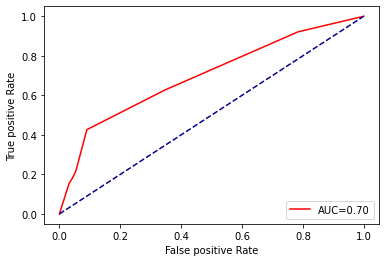

In [69]:
plt.plot(fpr,tpr,'red',label = 'AUC=%0.2f'% roc_auc)
plt.plot([0,1],[0,1], color = 'darkblue',linestyle='--')
plt.legend(loc = 'lower right')
plt.ylabel('True positive Rate')
plt.xlabel('False positive Rate')
plt.show()